In [14]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv("Data/NYCTaxiFares.csv")

In [29]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [6]:
df.pickup_datetime.max()

'2010-04-25 03:59:42 UTC'

In [7]:
df.fare_amount.describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

## Oblicz przejechaną odległość

[Wzór haversine](https://en.wikipedia.org/wiki/Haversine_formula) wyznacza odległość na kuli pomiędzy dwiema parami współrzędnych GPS.  

Szerokość geograficzną oznaczymy przez $\varphi$ (phi), a długość przez $\lambda$ (lambda).

Wzór przyjmuje postać:

$$
d = 2r \arcsin \left( 
    \sqrt{ 
        \sin^2\!\left(\frac{\varphi_2 - \varphi_1}{2}\right) 
        + \cos(\varphi_1)\cos(\varphi_2)\sin^2\!\left(\frac{\lambda_2 - \lambda_1}{2}\right) 
    } 
\right)
$$

przy czym:

$$
\begin{aligned}
r & : \text{ promień kuli (średni promień Ziemi to 6371 km)} \\
\varphi_1, \varphi_2 & : \text{ szerokości geograficzne punktów 1 i 2} \\
\lambda_1, \lambda_2 & : \text{ długości geograficzne punktów 1 i 2} \\
\end{aligned}
$$


In [39]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # średni promień Ziemi w kilometrach
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # w kilometrach

    return d

In [40]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [41]:
df["dist_km"] = haversine_distance(df, "pickup_latitude", 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [16]:
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321
...,...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1,5.751348
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1,5.767444
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3,5.052523
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1,1.208923


In [31]:
df["EDTdate"] = pd.to_datetime(df["pickup_datetime"].str[:19]) - pd.Timedelta(hours=4)

In [32]:
df["Hour"] = df.EDTdate.dt.hour

In [34]:
df.Hour.max()

23

In [35]:
df["AMorPM"] = np.where(df.Hour < 12, "am", "pm")

In [36]:
df["Weekday"] = df.EDTdate.dt.strftime("%a")

In [42]:
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,EDTdate,Hour,AMorPM,Weekday,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010-04-19 04:17:56,4,am,Mon,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010-04-17 11:43:53,11,am,Sat,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010-04-17 07:23:26,7,am,Sat,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010-04-11 17:25:03,17,pm,Sun,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010-04-16 22:19:01,22,pm,Fri,7.231321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1,2010-04-18 10:33:03,10,am,Sun,5.751348
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1,2010-04-23 06:27:48,6,am,Fri,5.767444
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3,2010-04-18 14:50:40,14,pm,Sun,5.052523
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1,2010-04-13 04:14:44,4,am,Tue,1.208923


In [38]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [43]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', "dist_km"]

In [44]:
y_col = ["fare_amount"]

In [45]:
for cat in cat_cols:
    df[cat] = df[cat].astype("category")

In [47]:
df.Hour.cat.categories

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32')

In [50]:
df.Hour.cat.codes.values

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [49]:
# NaN -> -1

In [52]:
hr = df.Hour.cat.codes.values
ampm = df.AMorPM.cat.codes.values
wkdy = df.Weekday.cat.codes.values

cats = np.stack((hr, ampm, wkdy), 1)

cats[:4]

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       [17,  1,  3]], dtype=int8)

In [53]:
import torch

In [54]:
cats = torch.tensor(cats, dtype=torch.int64)

In [55]:
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:4]

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        [-73.9905,  40.7564, -73.9712,  40.7482,   1.0000,   1.8641]])

In [57]:
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1, 1)

In [58]:
y[:4]

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        [ 8.9000]])

In [59]:
# embedingi

In [60]:
poniedzialek = [1, 0 , 0, 0, 0, 0, 0]

In [ ]:
poniedzialek = [0.1, 0.8, -0.3]

In [61]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [62]:
cat_szs

[24, 2, 7]

In [64]:
emb_szs = [(size, min(50, (size+1) // 2 )) for size in cat_szs]

In [65]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [66]:
import torch.nn  as nn

In [92]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers: list[int], p=0.5):
        super().__init__()

        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])

        self.emb_drop = nn.Dropout(p)

        self.bn_cont = nn.BatchNorm1d(n_cont)

        # budowanie sieci MLP

        layerlist = []
        n_emb = sum((nf for ni, nf in emb_szs))
        n_in = n_emb + n_cont

        for i in layers:

            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i

        layerlist.append(nn.Linear(layers[-1], out_sz))

        self.layers = nn.Sequential(
            *layerlist
        )

    def forward(self, X_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            # wektor embeddingu dla danej kolumny
            embeddings.append(e(X_cat[:, i]))

        # sklejanie emebeddingow w jedna macierz
        x = torch.cat(embeddings, 1)

        # dropout na embeddingu - zerowanie niektoryuch - randomoweo
        x = self.emb_drop(x)

        # normalizacja cech ciaglych
        x_cont = self.bn_cont(x_cont)

        # polaczenie embeddingow i cech ciaglych
        x = torch.cat([x, x_cont], 1)

        # przepuszczamy to co przygotowalismy przez nasza siec MLP
        x = self.layers(x)
        return x


torch.manual_seed(33)

model = TabularModel(emb_szs=emb_szs, n_cont=len(cont_cols), out_sz=1, layers=[200, 100], p=0.4)
print(model)

        
            
            
            
        
        

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)


In [93]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [94]:
batch_size = 60000
test_size = int(batch_size * .2)

cat_train = cats[:batch_size - test_size]
cat_test = cats[batch_size - test_size: batch_size]

con_train = conts[:batch_size - test_size]
con_test = conts[batch_size - test_size: batch_size]


y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size: batch_size]

In [95]:
len(y_train), len(y_test)

(48000, 12000)

In [96]:
%%time

epochs = a
losses = []


for i in range(1, epochs + 1):

    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss)

    if i % 25 == 0: print(f"Epoch {i:3} {loss.item():10.8f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    


Epoch  25 10.95196724
Epoch  50 10.25776958
Epoch  75 9.75834846
Epoch 100 9.19385719
Epoch 125 8.42674351
Epoch 150 7.42833567
Epoch 175 6.25619125
Epoch 200 5.05952406
Epoch 225 4.20975542
Epoch 250 3.87423420
Epoch 275 3.77017927
Epoch 300 3.70039654
Epoch 325 3.63196564
Epoch 350 3.58411670
Epoch 375 3.53231406
Epoch 400 3.50454187
CPU times: user 1min 8s, sys: 2.05 s, total: 1min 10s
Wall time: 41.6 s


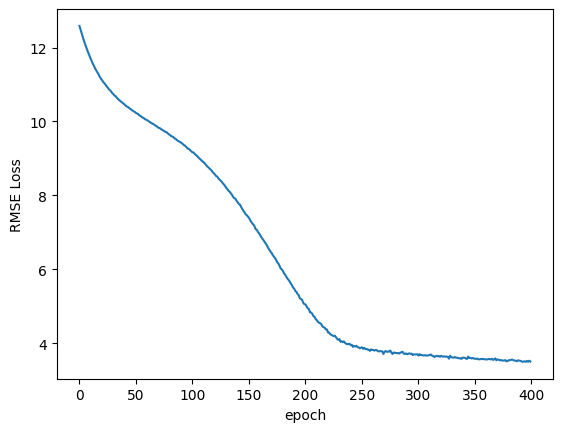

In [97]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [98]:
# ABY OCENIĆ CAŁY ZBIÓR TESTOWY
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 3.40572357


In [99]:
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,EDTdate,Hour,AMorPM,Weekday,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010-04-19 04:17:56,4,am,Mon,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010-04-17 11:43:53,11,am,Sat,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010-04-17 07:23:26,7,am,Sat,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010-04-11 17:25:03,17,pm,Sun,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010-04-16 22:19:01,22,pm,Fri,7.231321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03 UTC,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1,2010-04-18 10:33:03,10,am,Sun,5.751348
119996,2010-04-23 10:27:48 UTC,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1,2010-04-23 06:27:48,6,am,Fri,5.767444
119997,2010-04-18 18:50:40 UTC,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3,2010-04-18 14:50:40,14,pm,Sun,5.052523
119998,2010-04-13 08:14:44 UTC,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1,2010-04-13 04:14:44,4,am,Tue,1.208923


In [100]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'EDTdate', 'Hour', 'AMorPM', 'Weekday', 'dist_km'],
      dtype='object')

In [101]:
def test_data(mdl):
    mdl.eval()  # przełączamy w tryb ewaluacji, żeby BatchNorm i Dropout działały poprawnie

    # --- WPROWADŹ NOWE DANE ---
    plat = float(input('What is the pickup latitude?  '))
    plong = float(input('What is the pickup longitude? '))
    dlat = float(input('What is the dropoff latitude?  '))
    dlong = float(input('What is the dropoff longitude? '))
    psngr = int(input('How many passengers? '))
    dt = input('What is the pickup date and time?\nFormat as YYYY-MM-DD HH:MM:SS     ')

    # --- PRZETWÓRZ DANE ---
    dfx_dict = {
        'pickup_latitude': plat,
        'pickup_longitude': plong,
        'dropoff_latitude': dlat,
        'dropoff_longitude': dlong,
        'passenger_count': psngr,
        'EDTdate': dt
    }
    dfx = pd.DataFrame(dfx_dict, index=[0])

    dfx['dist_km'] = haversine_distance(
        dfx, 'pickup_latitude', 'pickup_longitude',
        'dropoff_latitude', 'dropoff_longitude'
    )
    dfx['EDTdate'] = pd.to_datetime(dfx['EDTdate'])

    dfx['Hour'] = dfx['EDTdate'].dt.hour
    dfx['AMorPM'] = np.where(dfx['Hour'] < 12, 0, 1)
    dfx['Weekday'] = dfx['EDTdate'].dt.strftime("%a")
    dfx['Weekday'] = dfx['Weekday'].replace(
        ['Fri','Mon','Sat','Sun','Thu','Tue','Wed'],
        [0,1,2,3,4,5,6]
    ).astype('int64')

    # --- UTWÓRZ TENSORY ---
    cat_cols = ['Hour', 'AMorPM', 'Weekday']
    cont_cols = [
        'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
        'dropoff_longitude', 'passenger_count', 'dist_km'
    ]

    xcats = np.stack([dfx[col].values for col in cat_cols], 1)
    xcats = torch.tensor(xcats, dtype=torch.int64)

    xconts = np.stack([dfx[col].values for col in cont_cols], 1)
    xconts = torch.tensor(xconts, dtype=torch.float)

    # --- PREDYKCJA ---
    with torch.no_grad():
        z = mdl(xcats, xconts).item()   # jedna liczba zamiast argmax()

    print(f'\nThe predicted fare is ${z:.2f}')


In [104]:

def build_dataframe(
    plat: float, plong: float,
    dlat: float, dlong: float,
    psngr: int, dt: str
) -> pd.DataFrame:
    """Buduje bazowy DataFrame z pojedynczym rekordem."""
    return pd.DataFrame({
        'pickup_latitude': plat,
        'pickup_longitude': plong,
        'dropoff_latitude': dlat,
        'dropoff_longitude': dlong,
        'passenger_count': psngr,
        'EDTdate': pd.to_datetime(dt)
    }, index=[0])


def add_distance_feature(df: pd.DataFrame) -> pd.DataFrame:
    """Dodaje kolumnę z odległością (w km)."""
    df['dist_km'] = haversine_distance(
        df, 'pickup_latitude', 'pickup_longitude',
        'dropoff_latitude', 'dropoff_longitude'
    )
    return df


def add_datetime_features(df: pd.DataFrame) -> pd.DataFrame:
    """Dodaje cechy związane z czasem (Hour, AMorPM, Weekday)."""
    df['Hour'] = df['EDTdate'].dt.hour
    df['AMorPM'] = np.where(df['Hour'] < 12, 0, 1)
    df['Weekday'] = (
        df['EDTdate']
        .dt.strftime("%a")
        .replace(
            ['Fri','Mon','Sat','Sun','Thu','Tue','Wed'],
            [0,1,2,3,4,5,6]
        )
        .astype('int64')
    )
    return df


def dataframe_to_tensors(df: pd.DataFrame) -> tuple[torch.Tensor, torch.Tensor]:
    """Konwertuje DataFrame do tensorów kategorii i wartości ciągłych."""
    cat_cols = ['Hour', 'AMorPM', 'Weekday']
    cont_cols = [
        'pickup_latitude', 'pickup_longitude',
        'dropoff_latitude', 'dropoff_longitude',
        'passenger_count', 'dist_km'
    ]

    xcats = torch.tensor(
        np.stack([df[col].values for col in cat_cols], 1),
        dtype=torch.int64
    )
    xconts = torch.tensor(
        np.stack([df[col].values for col in cont_cols], 1),
        dtype=torch.float
    )
    return xcats, xconts


def prepare_features(
    plat: float, plong: float,
    dlat: float, dlong: float,
    psngr: int, dt: str
) -> tuple[torch.Tensor, torch.Tensor]:
    """
    Przygotowuje cechy wejściowe (kategoryczne i ciągłe) 
    na podstawie podanych parametrów.
    """
    df = build_dataframe(plat, plong, dlat, dlong, psngr, dt)
    df = add_distance_feature(df)
    df = add_datetime_features(df)
    return dataframe_to_tensors(df)


def predict_fare(
    model,
    plat: float, plong: float,
    dlat: float, dlong: float,
    psngr: int, dt: str
) -> float:
    """
    Zwraca przewidywaną opłatę za kurs taksówką na podstawie modelu i parametrów wejściowych.
    """
    xcats, xconts = prepare_features(plat, plong, dlat, dlong, psngr, dt)

    with torch.no_grad():
        prediction = model(xcats, xconts)

    return prediction.item()


In [106]:
fare = predict_fare(
    model,
    plat=40.0,
    plong=-74.5,
    dlat=41,
    dlong=-73.3,
    psngr=1,
    dt="2010-04-12 08:24:00"
)
print(f"The predicted fare amount is ${fare:.2f}")

The predicted fare amount is $3974.72


/var/folders/ff/6wst9f1n1g96lc__ld426szh0000gn/T/ipykernel_80126/1711164533.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(


In [102]:
test_data(model)

What is the pickup latitude?   40
What is the pickup longitude?  -74.5
What is the dropoff latitude?   41
What is the dropoff longitude?  -73
How many passengers?  1
What is the pickup date and time?
Format as YYYY-MM-DD HH:MM:SS      2010-04-14 10:00:00



The predicted fare is $3971.45


/var/folders/ff/6wst9f1n1g96lc__ld426szh0000gn/T/ipykernel_80126/2620645930.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfx['Weekday'] = dfx['Weekday'].replace(
